In [3]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import scipy
from scipy import optimize as opt                                       
from scipy.optimize import minimize, fsolve, LinearConstraint  
from scipy.linalg import solve 

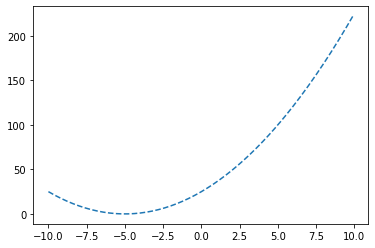

In [14]:
x = np.arange(-10,10,0.1)
y = (5.0 + x)**2.0
plt.plot(x,y,"--")
plt.show()

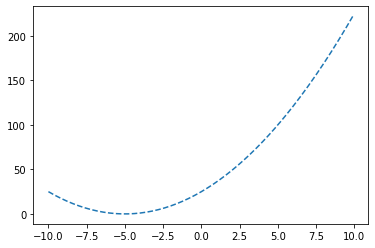

In [10]:
# objective function
def objective(x):
    return (5.0 + x)**2.0
# We can plot a coarse grid of this function with input values from -10 to 10 to get an idea of the shape of the target function.

# define range
r_min, r_max = -10.0, 10.0
# prepare inputs
inputs = np.arange(r_min, r_max, 0.1)
# compute targets
targets = [objective(x) for x in inputs]
# plot inputs vs target
plt.plot(inputs, targets, '--')
plt.show()

In [18]:
type(y)

numpy.ndarray

In [19]:
type(targets)

list

In [2]:
from scipy.optimize import minimize_scalar

result = minimize_scalar(objective)

# summarize the result
opt_x, opt_y = result['x'], result['fun']
print('Optimal Input x: %.6f' % opt_x)
print('Optimal Output f(x): %.6f' % opt_y)
print('Total Evaluations n: %d' % result['nfev'])

NameError: name 'objective' is not defined

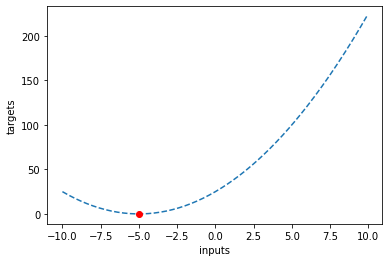

In [25]:
x = np.arange(-10,10,0.1)
y = (5.0 + x)**2.0
plt.plot(x,y,"--")
plt.xlabel("inputs")
plt.ylabel("targets")
plt.plot(opt_x,opt_y,marker="o",color="red")
plt.show()

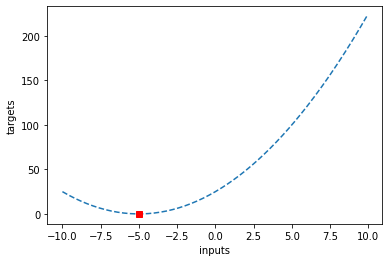

In [20]:
# Finally, we can plot the function again and mark the optima to confirm it was 
# located in the place we expected for this function.
# define the range
r_min, r_max = -10.0, 10.0
# prepare inputs
inputs = np.arange(r_min, r_max, 0.1)
# compute targets
targets = [objective(x) for x in inputs]
# plot inputs vs target
plt.plot(inputs, targets, '--')
plt.xlabel("inputs")
plt.ylabel("targets")
# plot the optima
plt.plot([opt_x], [opt_y], 's', color='r')
# show the plot
plt.show()

In [4]:
# set variables to determine the number of buyers in the market and 
# the number of shares you want to sell
n_buyers = 10
n_shares = 15

# Next, create arrays to store the price that each buyer pays, 
# the maximum amount they can afford to spend, and the maximum number of shares 
# each buyer can afford, given the first two arrays.
np.random.seed(10)

# Generating the array of prices the buyers will pay
# np.random.random() creates an array of random numbers
# on the half-open interval [0,1)
prices = np.random.random(n_buyers)
print("prices", prices)
# generate an array of integers on the half-open interval from [1, 4), 
# again with the size of the number of buyers
money_available = np.random.randint(1, 4, n_buyers)
print("money_available", money_available)

prices [0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665
 0.19806286 0.76053071 0.16911084 0.08833981]
money_available [1 1 1 3 1 3 3 2 1 1]


In [5]:
# take the ratio of the money_available with prices to 
# determine the maximum number of shares each buyer can purchase
n_shares_per_buyer = money_available / prices
# print each of these arrays separated by a newline
print(prices, money_available, n_shares_per_buyer, sep="\n")

[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665
 0.19806286 0.76053071 0.16911084 0.08833981]
[1 1 1 3 1 3 3 2 1 1]
[ 1.29647768 48.18824404  1.57816269  4.00638948  2.00598984 13.34539487
 15.14670609  2.62974258  5.91328161 11.3199242 ]


In [33]:
np.ones(n_buyers)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
n_shares

15

In [10]:
# create an array of ones with the length `n_buyers` and pass it as the first argument to 
# `LinearConstraint`
constraint = LinearConstraint(np.ones(n_buyers), lb=n_shares, ub=n_shares)

In [20]:
constraint.A

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [35]:
# use a comprehension to generate a list of tuples for each buyer
bounds = [(0, n) for n in n_shares_per_buyer]
print(bounds)
#define the objective function
def objective_function(x, prices):
    return -x.dot(prices)

[(0, 1.296477682439221), (0, 48.18824403823818), (0, 1.5781626853523065), (0, 4.006389483224008), (0, 2.0059898362934296), (0, 13.3453948697305), (0, 15.146706090719757), (0, 2.629742583593113), (0, 5.913281610609325), (0, 11.31992419669592)]


In [36]:
res = minimize(
    objective_function,
    x0=10 * np.random.random(n_buyers),
    args=(prices,),
    constraints=constraint,
    bounds=bounds,
)

print(res)

     fun: -8.783020157087615
     jac: array([-0.7713207 , -0.02075195, -0.63364828, -0.74880385, -0.49850702,
       -0.22479653, -0.19806278, -0.76053071, -0.16911077, -0.08833981])
 message: 'Optimization terminated successfully'
    nfev: 187
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([1.29647768e+00, 1.07635367e-13, 1.57816269e+00, 4.00638948e+00,
       2.00598984e+00, 3.48323773e+00, 3.99680289e-15, 2.62974258e+00,
       1.94817649e-14, 2.79247930e-14])


In [1]:
import numpy as np
x4 = np.array([1.29647768e+00, 1.07635367e-13, 1.57816269e+00, 4.00638948e+00,
       2.00598984e+00, 3.48323773e+00, 3.99680289e-15, 2.62974258e+00,
       1.94817649e-14, 2.79247930e-14])
A = np.ones(10)
print(A.dot(x4))

15.00000000000016


In [4]:
prices = np.array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701, 0.22479665,
 0.19806286, 0.76053071, 0.16911084, 0.08833981])
print(x4.dot(prices))

8.78302013804006


In [6]:
x5 = np.array([1.29647768e+00, 1.07635367e-13, 0.57816269e+00, 4.00638948e+00,
       2.00598984e+00, 3.48323773e+00, 4.99680289e-15, 2.62974258e+00,
       1.94817649e-14, 2.79247930e-14])
print(x5.dot(prices))

8.14937190804006


In [6]:
x0=10 * np.random.random(n_buyers),
x0

(array([2.91876068, 9.17774123, 7.14575783, 5.42544368, 1.42170048,
        3.7334076 , 6.74133615, 4.41833174, 4.34013993, 6.17766978]),)

In [7]:
prices

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981])

In [8]:
x1=10 * np.random.random(n_buyers)
x1

array([5.13138243, 6.50397182, 6.01038953, 8.05223197, 5.21647152,
       9.08648881, 3.19236089, 0.90459349, 3.00700057, 1.13984362])

In [9]:
x1.dot(prices)

20.503455636707574

In [1]:
objective_function(x1,prices)

NameError: name 'objective_function' is not defined

In [1]:
import matplotlib.pyplot as plt